## [Pokemon with stats - Kaggle](https://www.kaggle.com/abcsds/pokemon)

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('data/Pokemon.csv', index_col=0)
df.shape

(800, 12)

In [3]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [6]:
df.describe(include="object")

,Name,Type 1,Type 2
count,800,800,414
unique,800,18,18
top,Bulbasaur,Water,Flying
freq,1,112,97


In [7]:
df.nunique()

Name          800
Type 1         18
Type 2         18
Total         200
HP             94
Attack        111
Defense       103
Sp. Atk       105
Sp. Def        92
Speed         108
Generation      6
Legendary       2
dtype: int64

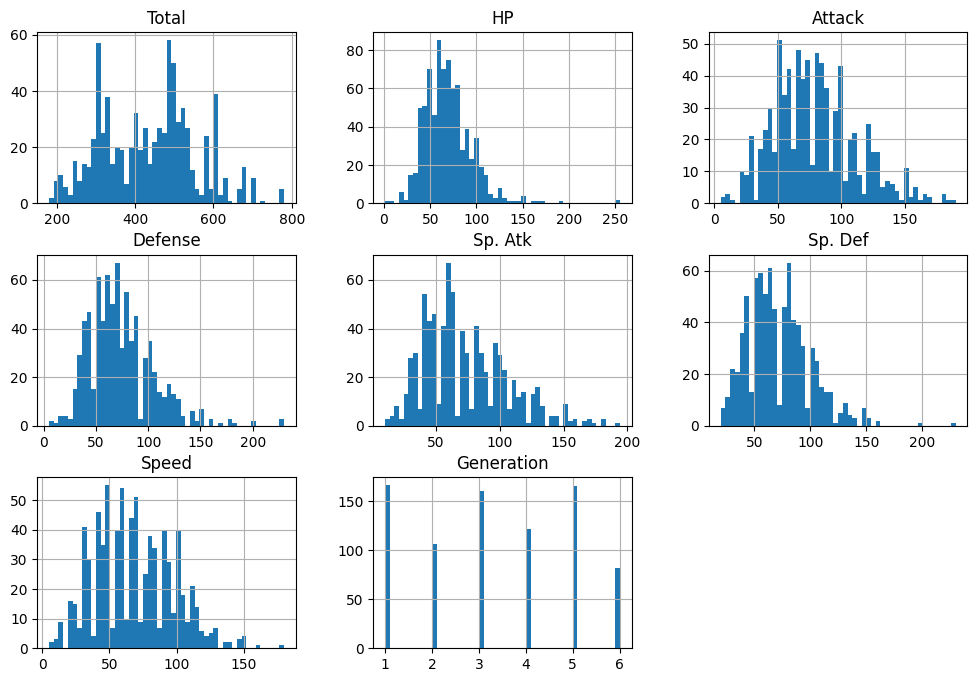

In [8]:
df.hist(figsize=(12, 8), bins=50);

In [9]:
df["Type 1"].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [10]:
df["Type 2"].value_counts()

Flying      97
Ground      35
Poison      34
Psychic     33
Fighting    26
Grass       25
Fairy       23
Steel       22
Dark        20
Dragon      18
Water       14
Ghost       14
Ice         14
Rock        14
Fire        12
Electric     6
Normal       4
Bug          3
Name: Type 2, dtype: int64

In [11]:
type12 = pd.crosstab(df["Type 1"], df["Type 2"])
type12

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0


In [12]:
type12.style.background_gradient(axis=None)

Type 2,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
Type 1,,,,,,,,,,,,,,,,,,
Bug,0,0,0,2,0,2,2,14,1,6,2,0,0,12,0,3,7,1
Dark,0,0,3,0,0,2,3,5,2,0,0,2,0,0,2,0,2,0
Dragon,0,0,0,1,1,0,1,6,0,0,5,3,0,0,4,0,0,0
Electric,0,0,1,0,1,0,1,5,1,1,0,1,2,0,0,0,3,1
Fairy,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
Fighting,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3,0,2,0
Fire,0,0,1,0,0,7,0,6,0,0,3,0,2,0,2,1,1,1
Flying,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Ghost,0,1,2,0,0,0,3,2,0,10,0,0,0,4,0,0,0,0


In [13]:
corr = df.corr(numeric_only=True)
corr

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384,0.501758
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683,0.273620
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451,0.345408
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419,0.246377
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437,0.448907
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486,0.363937
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121,0.326715
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000,0.079794
Legendary,0.501758,0.273620,0.345408,0.246377,0.448907,0.363937,0.326715,0.079794,1.000000


In [14]:
mask = np.triu(np.ones_like(corr))
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot: >

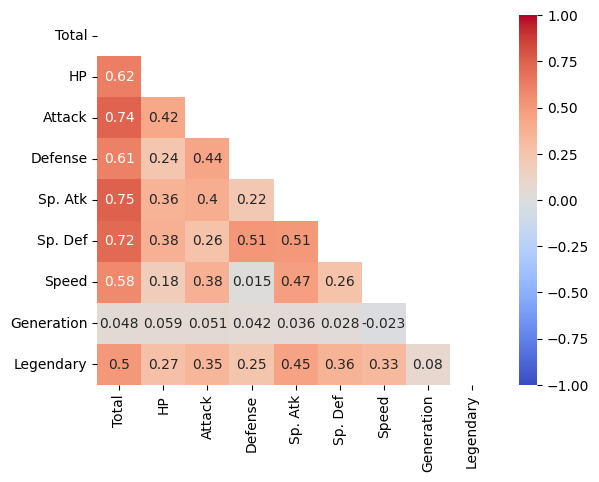

In [15]:
sns.heatmap(corr, annot=True, mask=mask, cmap="coolwarm", vmax=1, vmin=-1)

In [16]:
# px.scatter_matrix(df, color="Type 1", height=1000)

In [20]:
px.histogram(df, x="Type 1", y="Attack", color="Legendary")